In [1]:
import sumProduct as sp
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import graphviz as gp
import scipy.special
import scipy.stats

# To Do's mit dem surface Plot. 

- Sind die Probs aus dem zweiten Factor drin?
- einen dritten Factor reinmachen weil erst dann wird es spannend
- das gleiche auch noch einmal mit den hiddens... 

In [2]:
vlist=['H'+str(i) for i in range(20)]
hidden=[sp.variableNode(name, vrange=['pain', 'nopain']) for name in vlist]
Slist=['S'+str(i) for i in range(20)]
sensory=[sp.variableNode(name, vrange=['tickle','noci']) for name in Slist]
variables=sensory+hidden
len(variables)
factors=[]

In [3]:
prior=sp.freeEnergyFactorNode()
prior.addNeighbour(hidden[0])

def exprior(condrv,conditioners):
    if condrv[0] is None:
        return 100.0
    if condrv[0]=='nopain':
        return 0.2
    if condrv[0]=='pain':
        return 0.8
    
prior.setPrior(exprior)
factors.append(prior)
prior.predictFactor()

In [4]:
def hiddenprior(condrv,conditioners):
    print(condrv,conditioners),
    if condrv[0] is None:
        return 100.0
    if conditioners[0]=='pain':
        if condrv[0]=='pain':
            return 0.9
        if condrv[0]=='nopain':
            return 0.1
    else:
        if condrv[0]=='pain':
            return 0.9
        if condrv[0]=='nopain':
            return 0.1

In [5]:
parent=hidden[0]
hiddenfactors=[]
for child in hidden[1:]:
    fe=sp.freeEnergyFactorNode()
    fe.addNeighbour(child,isConditioner=False)
    fe.addNeighbour(parent,isConditioner=True)
    fe.setPrior(hiddenprior)
    factors.append(fe)
    hiddenfactors.append(fe)
    parent=child
    fe.predictFactor()
print(len(factors))
print(len(hiddenfactors))

(None,) ('pain',)
('pain',) ('pain',)
('nopain',) ('pain',)
(None,) ('nopain',)
('pain',) ('nopain',)
('nopain',) ('nopain',)
(None,) ('pain',)
('pain',) ('pain',)
('nopain',) ('pain',)
(None,) ('nopain',)
('pain',) ('nopain',)
('nopain',) ('nopain',)
(None,) ('pain',)
('pain',) ('pain',)
('nopain',) ('pain',)
(None,) ('nopain',)
('pain',) ('nopain',)
('nopain',) ('nopain',)
(None,) ('pain',)
('pain',) ('pain',)
('nopain',) ('pain',)
(None,) ('nopain',)
('pain',) ('nopain',)
('nopain',) ('nopain',)
(None,) ('pain',)
('pain',) ('pain',)
('nopain',) ('pain',)
(None,) ('nopain',)
('pain',) ('nopain',)
('nopain',) ('nopain',)
(None,) ('pain',)
('pain',) ('pain',)
('nopain',) ('pain',)
(None,) ('nopain',)
('pain',) ('nopain',)
('nopain',) ('nopain',)
(None,) ('pain',)
('pain',) ('pain',)
('nopain',) ('pain',)
(None,) ('nopain',)
('pain',) ('nopain',)
('nopain',) ('nopain',)
(None,) ('pain',)
('pain',) ('pain',)
('nopain',) ('pain',)
(None,) ('nopain',)
('pain',) ('nopain',)
('nopain',) ('no

In [6]:
def sensprior(condrv,conditioners):
    print(condrv,conditioners)
    if condrv[0] is None:
        return 300.0
    if conditioners[0]=='pain':
        if condrv[0]=='noci':
            return 0.9
        if condrv[0]=='tickle':
            return 0.1
    else:
        if condrv[0]=='tickle':
            return 0.9
        if condrv[0]=='noci':
            return 0.1

In [7]:
sensfactors=[]
for h,s in zip(hidden,sensory):
    f=sp.freeEnergyFactorNode()
    f.addNeighbour(s)
    f.addNeighbour(h,isConditioner=True)
    f.setPrior(sensprior)
    factors+=[f]
    sensfactors+=[f]
    f.predictFactor()
    
allNodes=variables+factors

(None,) ('pain',)
('tickle',) ('pain',)
('noci',) ('pain',)
(None,) ('nopain',)
('tickle',) ('nopain',)
('noci',) ('nopain',)
(None,) ('pain',)
('tickle',) ('pain',)
('noci',) ('pain',)
(None,) ('nopain',)
('tickle',) ('nopain',)
('noci',) ('nopain',)
(None,) ('pain',)
('tickle',) ('pain',)
('noci',) ('pain',)
(None,) ('nopain',)
('tickle',) ('nopain',)
('noci',) ('nopain',)
(None,) ('pain',)
('tickle',) ('pain',)
('noci',) ('pain',)
(None,) ('nopain',)
('tickle',) ('nopain',)
('noci',) ('nopain',)
(None,) ('pain',)
('tickle',) ('pain',)
('noci',) ('pain',)
(None,) ('nopain',)
('tickle',) ('nopain',)
('noci',) ('nopain',)
(None,) ('pain',)
('tickle',) ('pain',)
('noci',) ('pain',)
(None,) ('nopain',)
('tickle',) ('nopain',)
('noci',) ('nopain',)
(None,) ('pain',)
('tickle',) ('pain',)
('noci',) ('pain',)
(None,) ('nopain',)
('tickle',) ('nopain',)
('noci',) ('nopain',)
(None,) ('pain',)
('tickle',) ('pain',)
('noci',) ('pain',)
(None,) ('nopain',)
('tickle',) ('nopain',)
('noci',) ('no

In [8]:
outf=open("FREE.dot","w")
outf.write(hidden[0].dotPrint())
outf.close()
subprocess.call("neato -T png -o FREE.png FREE.dot", shell=True)

0

In [9]:
ppain_tickle=[]
ppain_noci=[]
pnopain_tickle=[]
pnopain_noci=[]
PCpain=[]
PCnopain=[]
Ppain_noci={}
Pnopain_tickle={}
Ppain_pain={}
Pnopain_nopain={}

trials=Tage, erst hierüber iterieren und 1 start learning für jeden Tag machen. Dann innerhalb von einem Tag über die Zeitschritte iterieren. 



In [10]:
for trial in range(10):
    sp.startLearning(allNodes)
    for i in sensory: 
        i.observe('tickle')
    sp.runSumProduct(allNodes)
    sp.accumulateEvidence(allNodes)
    sp.learn(allNodes)
    
    # Create the Dictionaries for the surface Plots: NoPain/Tickle
    Pnopain_tickle[0,trial]=[sensfactors[0].naturalParams[(('tickle',), ('nopain',))]]
    Pnopain_tickle[1,trial]=[sensfactors[1].naturalParams[(('tickle',), ('nopain',))]] 
    Pnopain_tickle[2,trial]=[sensfactors[2].naturalParams[(('tickle',), ('nopain',))]]
    Pnopain_tickle[3,trial]=[sensfactors[3].naturalParams[(('tickle',), ('nopain',))]]
    Pnopain_tickle[4,trial]=[sensfactors[4].naturalParams[(('tickle',), ('nopain',))]]
    Pnopain_tickle[5,trial]=[sensfactors[5].naturalParams[(('tickle',), ('nopain',))]]
    Pnopain_tickle[6,trial]=[sensfactors[6].naturalParams[(('tickle',), ('nopain',))]]
    Pnopain_tickle[7,trial]=[sensfactors[7].naturalParams[(('tickle',), ('nopain',))]]
    Pnopain_tickle[8,trial]=[sensfactors[8].naturalParams[(('tickle',), ('nopain',))]]
    Pnopain_tickle[9,trial]=[sensfactors[9].naturalParams[(('tickle',), ('nopain',))]]
    Pnopain_tickle[10,trial]=[sensfactors[10].naturalParams[(('tickle',), ('nopain',))]]
    Pnopain_tickle[11,trial]=[sensfactors[11].naturalParams[(('tickle',), ('nopain',))]]
    Pnopain_tickle[12,trial]=[sensfactors[12].naturalParams[(('tickle',), ('nopain',))]]
    Pnopain_tickle[13,trial]=[sensfactors[13].naturalParams[(('tickle',), ('nopain',))]]
    Pnopain_tickle[14,trial]=[sensfactors[14].naturalParams[(('tickle',), ('nopain',))]]
    Pnopain_tickle[15,trial]=[sensfactors[15].naturalParams[(('tickle',), ('nopain',))]]
    Pnopain_tickle[16,trial]=[sensfactors[16].naturalParams[(('tickle',), ('nopain',))]]
    Pnopain_tickle[17,trial]=[sensfactors[17].naturalParams[(('tickle',), ('nopain',))]]
    Pnopain_tickle[18,trial]=[sensfactors[18].naturalParams[(('tickle',), ('nopain',))]]
    Pnopain_tickle[19,trial]=[sensfactors[19].naturalParams[(('tickle',), ('nopain',))]]
# Create the Dictionaries for surface plots: Pain/Noci
    Ppain_noci[0,trial]=[sensfactors[0].naturalParams[(('noci',), ('pain',))]]
    Ppain_noci[1,trial]=[sensfactors[1].naturalParams[(('noci',), ('pain',))]] 
    Ppain_noci[2,trial]=[sensfactors[2].naturalParams[(('noci',), ('pain',))]]
    Ppain_noci[3,trial]=[sensfactors[3].naturalParams[(('noci',), ('pain',))]]
    Ppain_noci[4,trial]=[sensfactors[4].naturalParams[(('noci',), ('pain',))]]
    Ppain_noci[5,trial]=[sensfactors[5].naturalParams[(('noci',), ('pain',))]]
    Ppain_noci[6,trial]=[sensfactors[6].naturalParams[(('noci',), ('pain',))]]
    Ppain_noci[7,trial]=[sensfactors[7].naturalParams[(('noci',), ('pain',))]]
    Ppain_noci[8,trial]=[sensfactors[8].naturalParams[(('noci',), ('pain',))]]
    Ppain_noci[9,trial]=[sensfactors[9].naturalParams[(('noci',), ('pain',))]]
    Ppain_noci[10,trial]=[sensfactors[10].naturalParams[(('noci',), ('pain',))]]
    Ppain_noci[11,trial]=[sensfactors[11].naturalParams[(('noci',), ('pain',))]]
    Ppain_noci[12,trial]=[sensfactors[12].naturalParams[(('noci',), ('pain',))]]
    Ppain_noci[13,trial]=[sensfactors[13].naturalParams[(('noci',), ('pain',))]]
    Ppain_noci[14,trial]=[sensfactors[14].naturalParams[(('noci',), ('pain',))]]
    Ppain_noci[15,trial]=[sensfactors[15].naturalParams[(('noci',), ('pain',))]]
    Ppain_noci[16,trial]=[sensfactors[16].naturalParams[(('noci',), ('pain',))]]
    Ppain_noci[17,trial]=[sensfactors[17].naturalParams[(('noci',), ('pain',))]]
    Ppain_noci[18,trial]=[sensfactors[18].naturalParams[(('noci',), ('pain',))]]
    Ppain_noci[19,trial]=[sensfactors[19].naturalParams[(('noci',), ('pain',))]]
# Create the dictionaries for the surface plots: Pain|Pain
    Ppain_pain[0,trial]=[hiddenfactors[0].naturalParams[(('pain',), ('pain',))]]
    Ppain_pain[1,trial]=[hiddenfactors[1].naturalParams[(('pain',), ('pain',))]]
    Ppain_pain[2,trial]=[hiddenfactors[2].naturalParams[(('pain',), ('pain',))]]
    Ppain_pain[3,trial]=[hiddenfactors[3].naturalParams[(('pain',), ('pain',))]]
    Ppain_pain[4,trial]=[hiddenfactors[4].naturalParams[(('pain',), ('pain',))]]
    Ppain_pain[5,trial]=[hiddenfactors[5].naturalParams[(('pain',), ('pain',))]]
    Ppain_pain[6,trial]=[hiddenfactors[6].naturalParams[(('pain',), ('pain',))]]
    Ppain_pain[7,trial]=[hiddenfactors[7].naturalParams[(('pain',), ('pain',))]]
    Ppain_pain[8,trial]=[hiddenfactors[8].naturalParams[(('pain',), ('pain',))]]
    Ppain_pain[9,trial]=[hiddenfactors[9].naturalParams[(('pain',), ('pain',))]]
    Ppain_pain[10,trial]=[hiddenfactors[10].naturalParams[(('pain',), ('pain',))]]
    Ppain_pain[11,trial]=[hiddenfactors[11].naturalParams[(('pain',), ('pain',))]]
    Ppain_pain[12,trial]=[hiddenfactors[12].naturalParams[(('pain',), ('pain',))]]
    Ppain_pain[13,trial]=[hiddenfactors[13].naturalParams[(('pain',), ('pain',))]]
    Ppain_pain[14,trial]=[hiddenfactors[14].naturalParams[(('pain',), ('pain',))]]
    Ppain_pain[15,trial]=[hiddenfactors[15].naturalParams[(('pain',), ('pain',))]]
    Ppain_pain[16,trial]=[hiddenfactors[16].naturalParams[(('pain',), ('pain',))]]
    Ppain_pain[17,trial]=[hiddenfactors[17].naturalParams[(('pain',), ('pain',))]]
    Ppain_pain[18,trial]=[hiddenfactors[18].naturalParams[(('pain',), ('pain',))]]
# Create dictionaries for the surface plots: 
    Pnopain_nopain[0,trial]=[hiddenfactors[0].naturalParams[(('nopain',), ('nopain',))]]
    Pnopain_nopain[1,trial]=[hiddenfactors[1].naturalParams[(('nopain',), ('nopain',))]]
    Pnopain_nopain[2,trial]=[hiddenfactors[2].naturalParams[(('nopain',), ('nopain',))]]
    Pnopain_nopain[3,trial]=[hiddenfactors[3].naturalParams[(('nopain',), ('nopain',))]]
    Pnopain_nopain[4,trial]=[hiddenfactors[4].naturalParams[(('nopain',), ('nopain',))]]
    Pnopain_nopain[5,trial]=[hiddenfactors[5].naturalParams[(('nopain',), ('nopain',))]]
    Pnopain_nopain[6,trial]=[hiddenfactors[6].naturalParams[(('nopain',), ('nopain',))]]
    Pnopain_nopain[7,trial]=[hiddenfactors[7].naturalParams[(('nopain',), ('nopain',))]]
    Pnopain_nopain[8,trial]=[hiddenfactors[8].naturalParams[(('nopain',), ('nopain',))]]
    Pnopain_nopain[9,trial]=[hiddenfactors[9].naturalParams[(('nopain',), ('nopain',))]]
    Pnopain_nopain[10,trial]=[hiddenfactors[10].naturalParams[(('nopain',), ('nopain',))]]
    Pnopain_nopain[11,trial]=[hiddenfactors[11].naturalParams[(('nopain',), ('nopain',))]]
    Pnopain_nopain[12,trial]=[hiddenfactors[12].naturalParams[(('nopain',), ('nopain',))]]
    Pnopain_nopain[13,trial]=[hiddenfactors[13].naturalParams[(('nopain',), ('nopain',))]]
    Pnopain_nopain[14,trial]=[hiddenfactors[14].naturalParams[(('nopain',), ('nopain',))]]
    Pnopain_nopain[15,trial]=[hiddenfactors[15].naturalParams[(('nopain',), ('nopain',))]]
    Pnopain_nopain[16,trial]=[hiddenfactors[16].naturalParams[(('nopain',), ('nopain',))]]
    Pnopain_nopain[17,trial]=[hiddenfactors[17].naturalParams[(('nopain',), ('nopain',))]]
    Pnopain_nopain[18,trial]=[hiddenfactors[18].naturalParams[(('nopain',), ('nopain',))]]

started learning for freeEnergyFactor:H0|
started learning for freeEnergyFactor:H1|H0
started learning for freeEnergyFactor:H2|H1
started learning for freeEnergyFactor:H3|H2
started learning for freeEnergyFactor:H4|H3
started learning for freeEnergyFactor:H5|H4
started learning for freeEnergyFactor:H6|H5
started learning for freeEnergyFactor:H7|H6
started learning for freeEnergyFactor:H8|H7
started learning for freeEnergyFactor:H9|H8
started learning for freeEnergyFactor:H10|H9
started learning for freeEnergyFactor:H11|H10
started learning for freeEnergyFactor:H12|H11
started learning for freeEnergyFactor:H13|H12
started learning for freeEnergyFactor:H14|H13
started learning for freeEnergyFactor:H15|H14
started learning for freeEnergyFactor:H16|H15
started learning for freeEnergyFactor:H17|H16
started learning for freeEnergyFactor:H18|H17
started learning for freeEnergyFactor:H19|H18
started learning for freeEnergyFactor:S0|H0
started learning for freeEnergyFactor:S1|H1
started learnin

In [11]:
Pnopain_tickle

{(0, 0): [0.9],
 (0, 1): [0.9],
 (0, 2): [0.9],
 (0, 3): [0.9],
 (0, 4): [0.9],
 (0, 5): [0.9],
 (0, 6): [0.9],
 (0, 7): [0.9],
 (0, 8): [0.9],
 (0, 9): [0.9],
 (1, 0): [0.9],
 (1, 1): [0.9],
 (1, 2): [0.9],
 (1, 3): [0.9],
 (1, 4): [0.9],
 (1, 5): [0.9],
 (1, 6): [0.9],
 (1, 7): [0.9],
 (1, 8): [0.9],
 (1, 9): [0.9],
 (2, 0): [0.9],
 (2, 1): [0.9],
 (2, 2): [0.9],
 (2, 3): [0.9],
 (2, 4): [0.9],
 (2, 5): [0.9],
 (2, 6): [0.9],
 (2, 7): [0.9],
 (2, 8): [0.9],
 (2, 9): [0.9],
 (3, 0): [0.9],
 (3, 1): [0.9],
 (3, 2): [0.9],
 (3, 3): [0.9],
 (3, 4): [0.9],
 (3, 5): [0.9],
 (3, 6): [0.9],
 (3, 7): [0.9],
 (3, 8): [0.9],
 (3, 9): [0.9],
 (4, 0): [0.9],
 (4, 1): [0.9],
 (4, 2): [0.9],
 (4, 3): [0.9],
 (4, 4): [0.9],
 (4, 5): [0.9],
 (4, 6): [0.9],
 (4, 7): [0.9],
 (4, 8): [0.9],
 (4, 9): [0.9],
 (5, 0): [0.9],
 (5, 1): [0.9],
 (5, 2): [0.9],
 (5, 3): [0.9],
 (5, 4): [0.9],
 (5, 5): [0.9],
 (5, 6): [0.9],
 (5, 7): [0.9],
 (5, 8): [0.9],
 (5, 9): [0.9],
 (6, 0): [0.9],
 (6, 1): [0.9],
 (6, 2):

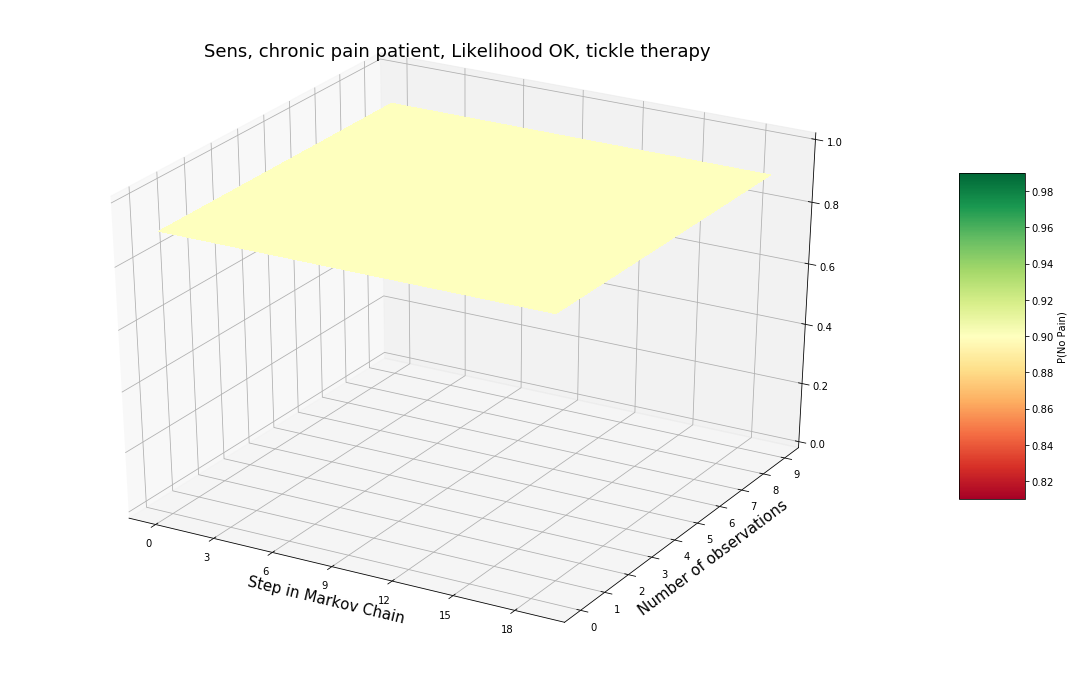

In [12]:
# P of No Pain given observations
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter, MaxNLocator

# Shape the data for the surface Plot
X = np.arange(len(Slist)) 
Y = np.arange(10) # Anzahl der observational trials von oben hier manuell eintragen!
X,Y = np.meshgrid(X,Y) 
Z = []
for x,y in zip(X.flat,Y.flat):
    Z.append(Pnopain_tickle[(x,y)])
    
Z=np.array(Z).reshape(X.shape)

# Plot 
fig = plt.figure(figsize=(20.0,12.0))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.RdYlGn,linewidth=0, antialiased=False)

plt.xlabel('Step in Markov Chain', fontsize=15)
plt.ylabel('Number of observations', fontsize=15)
plt.title('Sens, chronic pain patient, Likelihood OK, tickle therapy',fontsize=18)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

axes = plt.gca()
axes.set_zlim([0.0,1])

fig.colorbar(surf, shrink=0.5, aspect=5, label='P(No Pain)')
plt.savefig('Surf_10_observations_rotated.png')
plt.show()

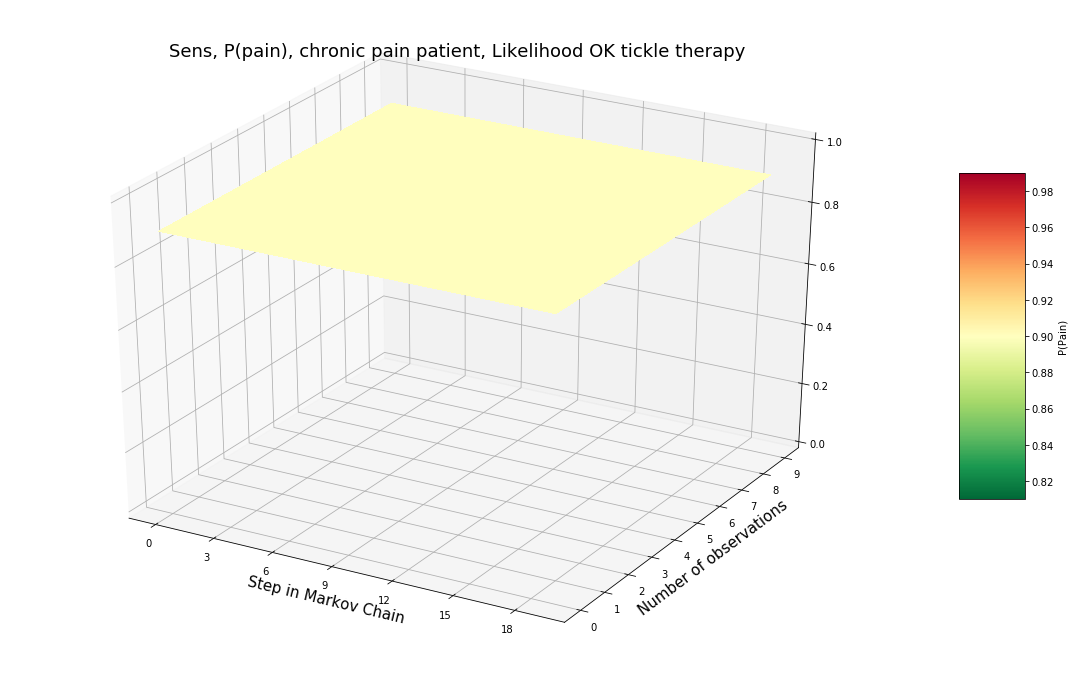

In [13]:
# P(Pain) given observations
# Shape the data for the surface Plot
A = np.arange(len(Slist)) 
B = np.arange(10) # Anzahl der observations/ learnings von oben hier eintragen
A,B = np.meshgrid(A,B) 
C = []
for a,b in zip(A.flat,B.flat):
    C.append(Ppain_noci[(a,b)])
    
C=np.array(C).reshape(A.shape)

# Plot 
fig = plt.figure(figsize=(20.0,12.0))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A, B, C, cmap=cm.RdYlGn_r,linewidth=0, antialiased=False)

plt.xlabel('Step in Markov Chain', fontsize=15)
plt.ylabel('Number of observations', fontsize=15)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Sens, P(pain), chronic pain patient, Likelihood OK tickle therapy', fontsize=18)

axes = plt.gca()
axes.set_zlim([0.0,1])



fig.colorbar(surf, shrink=0.5, aspect=5, label='P(Pain)')
plt.savefig('Surf_10_observations_PofPain.png')
plt.show()

For rotation

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

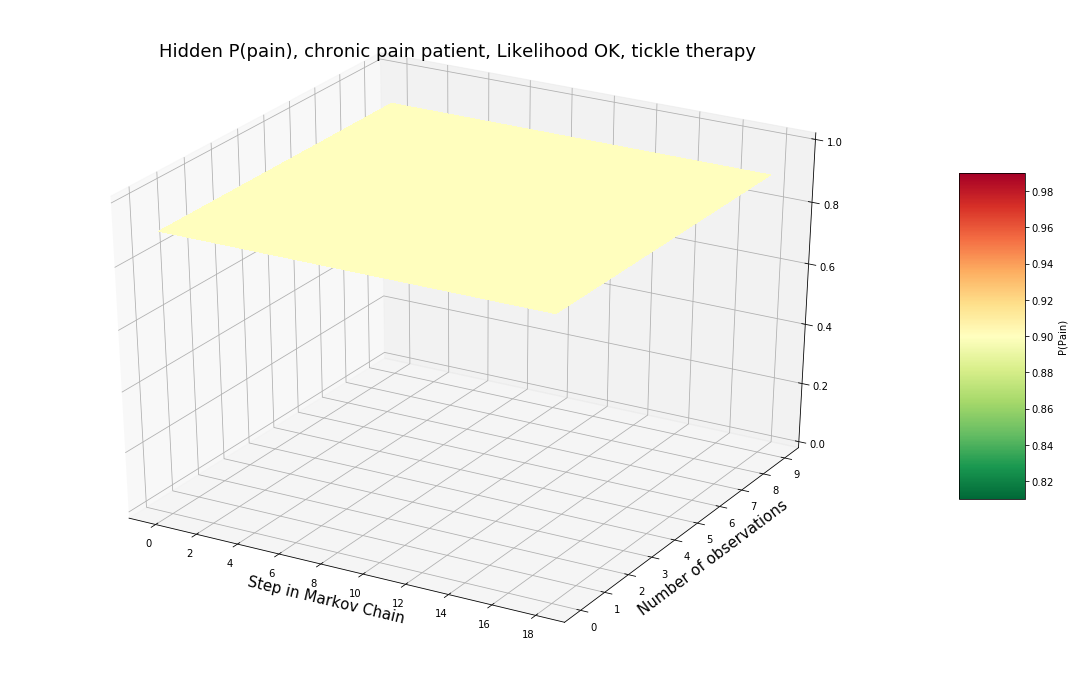

In [14]:
# P(Pain) given Pain in t-1
# Shape the data for the surface Plot
D = np.arange(19) 
E = np.arange(10) # Anzahl der observations/ learnings von oben hier eintragen
D,E = np.meshgrid(D,E) 
F = []
for d,e in zip(D.flat,E.flat):
    F.append(Ppain_pain[(d,e)])
    
F=np.array(F).reshape(D.shape)

# Plot 
fig = plt.figure(figsize=(20.0,12.0))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(D, E, F, cmap=cm.RdYlGn_r,linewidth=0, antialiased=False)

plt.xlabel('Step in Markov Chain', fontsize=15)
plt.ylabel('Number of observations', fontsize=15)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Hidden P(pain), chronic pain patient, Likelihood OK, tickle therapy', fontsize=18)

axes = plt.gca()
axes.set_zlim([0.0,1])



fig.colorbar(surf, shrink=0.5, aspect=5, label='P(Pain)')
plt.savefig('Surf_Ppain_Pain.png')
plt.show()

In [16]:
Pnopain_nopain

{(0, 0): [0.10000000000000003],
 (0, 1): [0.10000000000000007],
 (0, 2): [0.1000000000000001],
 (0, 3): [0.10000000000000014],
 (0, 4): [0.10000000000000017],
 (0, 5): [0.10000000000000021],
 (0, 6): [0.10000000000000026],
 (0, 7): [0.10000000000000028],
 (0, 8): [0.10000000000000032],
 (0, 9): [0.10000000000000035],
 (1, 0): [0.10000000000000003],
 (1, 1): [0.10000000000000007],
 (1, 2): [0.1000000000000001],
 (1, 3): [0.10000000000000014],
 (1, 4): [0.10000000000000017],
 (1, 5): [0.10000000000000021],
 (1, 6): [0.10000000000000026],
 (1, 7): [0.10000000000000028],
 (1, 8): [0.10000000000000032],
 (1, 9): [0.10000000000000035],
 (2, 0): [0.10000000000000003],
 (2, 1): [0.10000000000000007],
 (2, 2): [0.1000000000000001],
 (2, 3): [0.10000000000000014],
 (2, 4): [0.10000000000000017],
 (2, 5): [0.10000000000000021],
 (2, 6): [0.10000000000000026],
 (2, 7): [0.10000000000000028],
 (2, 8): [0.10000000000000032],
 (2, 9): [0.10000000000000035],
 (3, 0): [0.10000000000000003],
 (3, 1): [0

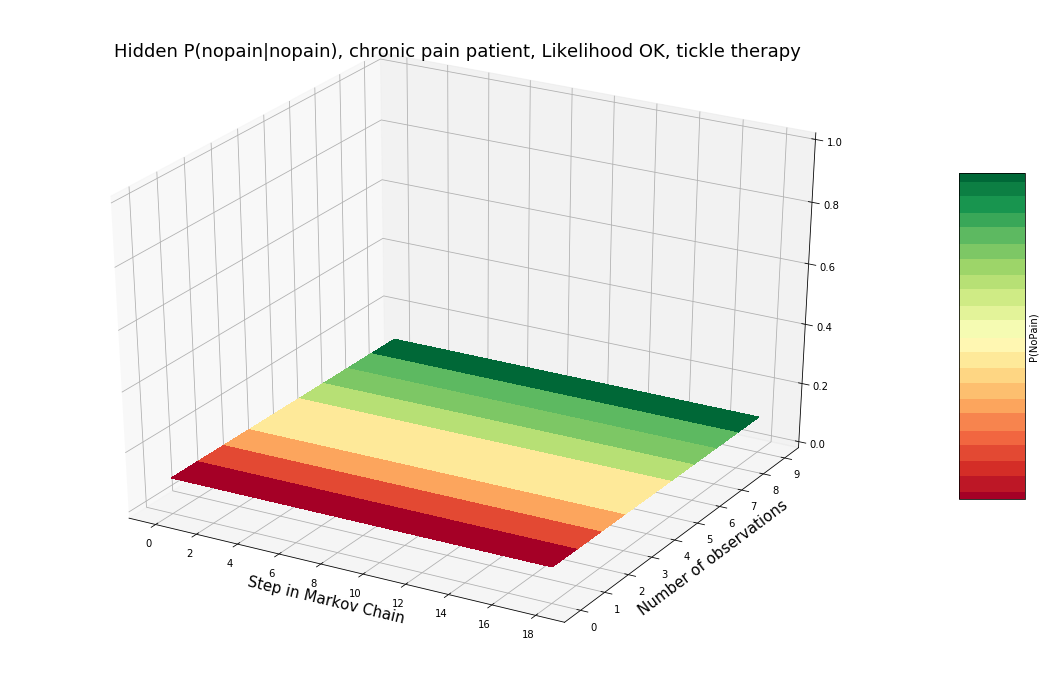

In [15]:
# P(NOpain) given NOPain in t-1
# Shape the data for the surface Plot
G = np.arange(19) 
H = np.arange(10) # Anzahl der observations/ learnings von oben hier eintragen
G,H = np.meshgrid(G,H) 
I = []
for g,h in zip(G.flat,H.flat):
    I.append(Pnopain_nopain[(g,h)])
    
I=np.array(I).reshape(G.shape)

# Plot 
fig = plt.figure(figsize=(20.0,12.0))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(G, H, I, cmap=cm.RdYlGn,linewidth=0, antialiased=False)

plt.xlabel('Step in Markov Chain', fontsize=15)
plt.ylabel('Number of observations', fontsize=15)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Hidden P(nopain|nopain), chronic pain patient, Likelihood OK, tickle therapy', fontsize=18)

axes = plt.gca()
axes.set_zlim([0.0,1])



fig.colorbar(surf, shrink=0.5, aspect=5, label='P(NoPain)')
plt.savefig('Surf_Ppain_Pain.png')
plt.show()

Einmal vor dem Lernen schauen: sind die priors sichtbar? 
Das muss sich mit dem lernen und dem observen ändern

Zustände der Markov Kette plotten die marginals hidden variables! Die muss ich nochmal plotten um zu schauen ob die perception funktioniert!

Was passiert im Tagesverlauf?